# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.


In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

from google.colab import drive
drive.mount('/content/drive')

# Google Colab Notebooks path
# Please comment out the colab paths to proceed
mouse_metadata_path = "/content/drive/MyDrive/Colab Notebooks/Module 5/Mouse_metadata.csv"
study_results_path = "/content/drive/MyDrive/Colab Notebooks/Module 5/Study_results.csv"


# Study data files
# Please uncomment the path variables to proceed
# mouse_metadata_path = "data/Mouse_metadata.csv"
# study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview

mouse_study_df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = mouse_study_df["Mouse ID"].value_counts()
print(len(mice))


249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_study_df[~mouse_study_df['Mouse ID'].isin(['g989'])]
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_mouse_df["Mouse ID"].value_counts()
print(len(mice_count))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean = clean_mouse_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median = clean_mouse_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
var = clean_mouse_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
sd = clean_mouse_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem = clean_mouse_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({"Mean Tumor Volume": mean,
                           "Median Tumor Volume": median,
                           "Tumor Volume Variance": var,
                           "Tumor Volume Std Dev": sd,
                           "Tumor Volume SEM": sem})

summary_df


<ipython-input-7-fb2b62cf4a2e>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = clean_mouse_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
<ipython-input-7-fb2b62cf4a2e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = clean_mouse_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
<ipython-input-7-fb2b62cf4a2e>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  var = clean_mouse_df.group

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

agg_summary_df = clean_mouse_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(
    ["mean", "median", "var", "std", "sem"])

agg_summary_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

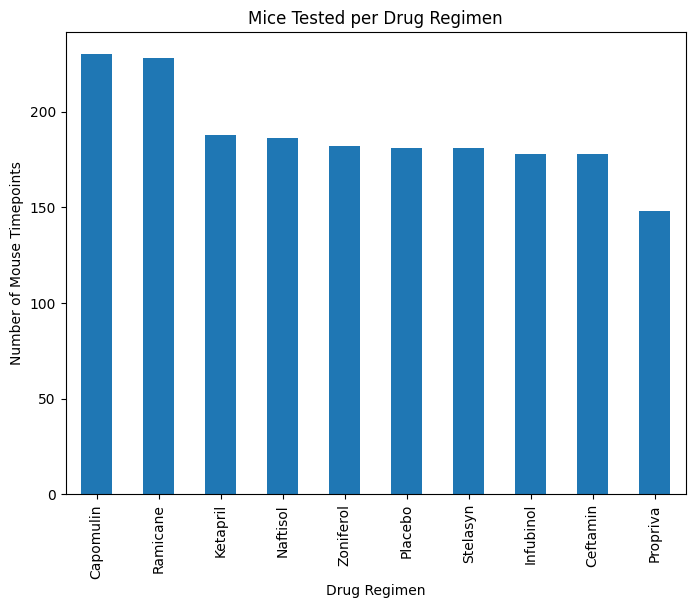

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = clean_mouse_df["Drug Regimen"].value_counts()

bar_plot = timepoints.plot(kind="bar", figsize=(8, 6))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Timepoints")
plt.title("Mice Tested per Drug Regimen")

plt.show()


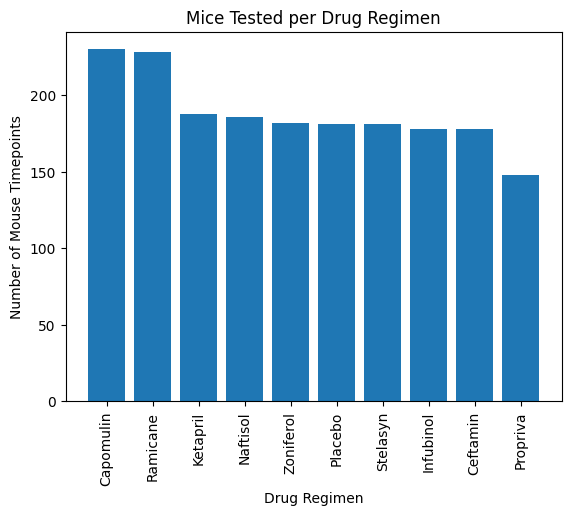

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_pyplot = clean_mouse_df["Drug Regimen"].value_counts()

x = timepoints_pyplot.index
y = timepoints_pyplot.values

plt.bar(x, y)
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.ylabel("Number of Mouse Timepoints")
plt.title("Mice Tested per Drug Regimen")

plt.show()


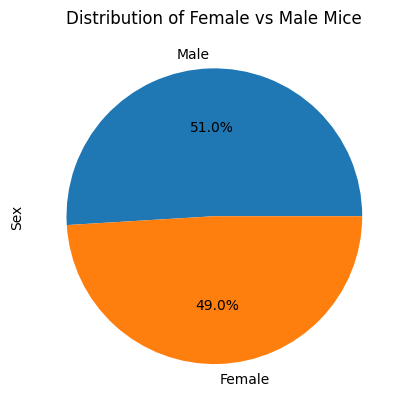

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie = clean_mouse_df["Sex"].value_counts()

pie.plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")

plt.show()


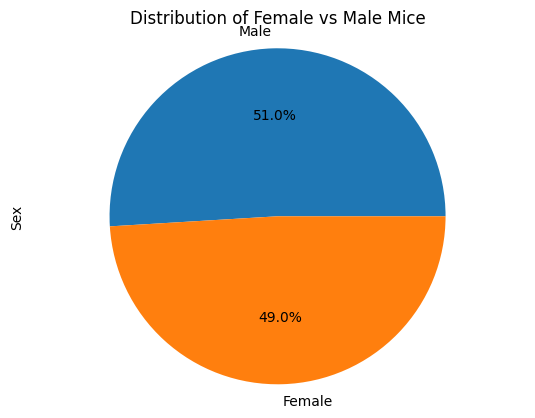

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_pie = clean_mouse_df["Sex"].value_counts()

labels = ["Male", "Female"]
plt.pie(pyplot_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.title("Distribution of Female vs Male Mice")

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_mouse_df.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = max_timepoint.merge(clean_mouse_df, on=["Mouse ID", "Timepoint"], how="inner")
merged_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    rows = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # add subset
    tumor_volume.extend(rows)

    # Determine outliers using upper and lower bounds
    quartiles = rows.quantile([.25, .5, .75])
    lowerq = quartiles.loc[.25]
    upperq = quartiles.loc[.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = rows[(rows < lower_bound) | (rows > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

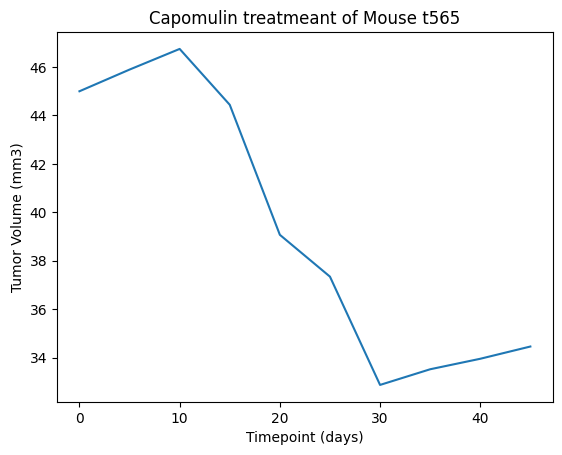

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]
mouse_t565 = capomulin.loc[capomulin["Mouse ID"] == "t565",:]

x = mouse_t565["Timepoint"]
y = mouse_t565["Tumor Volume (mm3)"]

plt.plot(x, y)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatmeant of Mouse t565")

plt.show()


<ipython-input-17-e6e5c4ae62ec>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_volume = capomulin.groupby(["Mouse ID"]).mean()


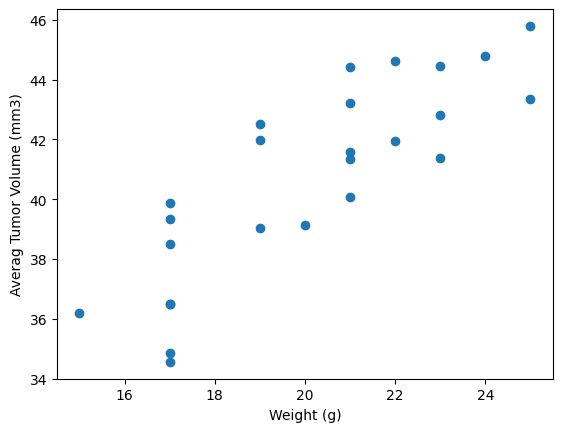

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_volume = capomulin.groupby(["Mouse ID"]).mean()

plt.scatter(avg_volume["Weight (g)"], avg_volume["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_volume["Weight (g)"], avg_volume["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {correlation[0]}")


The correlation between mouse weight and the average tumor volume is 0.841936342469472
